In [ ]:
from google_images_download import google_images_download

In [ ]:
def downloadimages(query):
	response = google_images_download.googleimagesdownload() 
	# keywords is the search query 
	# format is the image file format 
	# limit is the number of images to be downloaded 
	# print urs is to print the image file url 
	# size is the image size which can 
	# be specified manually ("large, medium, icon") 
	# aspect ratio denotes the height width ratio 
	# of images to download. ("tall, square, wide, panoramic") 
	arguments = {"keywords": query, 
				#"format": "jpg", 
				"limit":100,
				"print_urls":True}
				#"size": "large"}
				#"aspect_ratio": "panoramic" }
	try: 
		response.download(arguments) 
	
	# Handling File NotFound Error	 
	except FileNotFoundError: 
		arguments = {"keywords": query, 
					"format": "jpg", 
					"limit":4, 
					"print_urls":True, 
					"size": "medium"} 
					
		# Providing arguments for the searched query 
		try: 
			# Downloading the photos based 
			# on the given arguments 
			response.download(arguments) 
		except: 
			pass

In [ ]:
downloadimages('do huyet ap')

In [143]:
import numpy as np 
import pytesseract
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os

In [141]:
# facare 1: (600,150, 3) :,0:300,: :,300:500,:  :,500:,:

In [142]:
path = '/home/vietlq4/PaddleOCR/datasets/customdata/images/test/iphone/facare/IMG_0948/facare_IMG_0948_iframe870.jpg'

In [145]:
base_name = os.path.basename(path)

In [136]:
im = cv2.imread('/home/vietlq4/PaddleOCR/cropper/yolov5/warped2.png', cv2.IMREAD_UNCHANGED)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

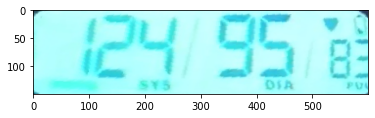

In [137]:
plt.imshow(im)

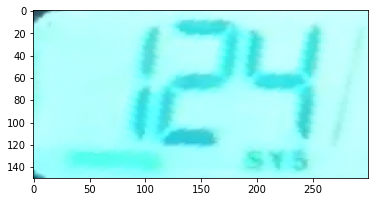

In [138]:
plt.imshow(im[:,0:300,:])

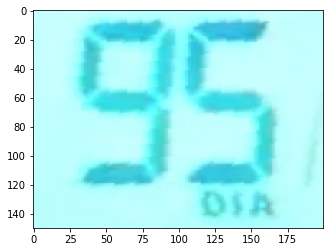

In [139]:
plt.imshow(im[:,300:500,:])

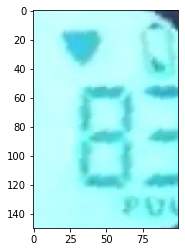

In [140]:
plt.imshow(im[:,500:,:])

In [54]:
squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
light = cv2.morphologyEx(im, cv2.MORPH_CLOSE, squareKern)
light = cv2.threshold(light, 0, 255,
			cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [62]:
def noise_removal(image, kernel_size_1, kernel_size_2):
    kernel = np.ones(kernel_size_1, np.uint8)
    image = cv2.dilate(image,kernel,iterations=1)
    kernel = np.ones(kernel_size_2, np.uint8)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image,3)
    return image

im = noise_removal(im, (1,1),(1,1))

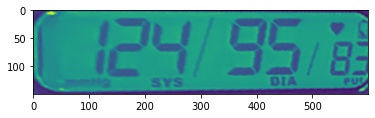

In [63]:
plt.imshow(im)

In [68]:
im = cv2.GaussianBlur(im,(5,5), 0)

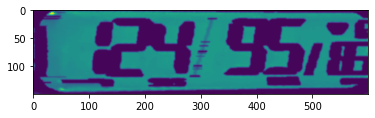

In [69]:
plt.imshow(im)

In [ ]:
plt.imshow(im, cmap='gray')


In [11]:
import io
import os

# Imports the Google Cloud client library
from google.cloud import vision
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/home/vietlq4/Downloads/fit-brand-299211-ab92e3cbebe0.json'
# Instantiates a client
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [13]:
detect_text('/home/vietlq4/PaddleOCR/cropper/yolov5/warped1.png')

Texts:

"110/811
mmHg
SYS
DIA
PUL"
bounds: (29,17),(550,17),(550,142),(29,142)

"110/811"
bounds: (70,17),(509,19),(509,120),(70,118)

"mmHg"
bounds: (29,124),(104,124),(104,142),(29,142)

"SYS"
bounds: (176,125),(229,125),(229,142),(176,142)

"DIA"
bounds: (382,125),(428,125),(428,140),(382,140)

"PUL"
bounds: (511,128),(550,128),(550,139),(511,139)
